# FOODMATE RECOMMENDATION SYSTEM


## A. BUSINESS UNDERSTANDING.

## 1. Defining the question.

### a.) Specifying the data analytic question

> **Problem Statement**:The problem addressed by this dataset is the lack of easily accessible and comprehensive information about the nutritional values of common foods and products. This can make it difficult for people to make informed decisions about their diet and can contribute to health problems such as obesity and malnutrition.


### b.) Metric for success.

To deem our recommender system effective, it should achieve the following benchmarks:

1. Attain a low score for root mean square error.
2. Achieve a low value for mean absolute error.

### c.) Understanding the context

The food and health industry is a highly competitive and crowded space. With so many diet plans, meal delivery services, and health apps available, it can be overwhelming for individuals to navigate and make informed decisions about their dietary choices. This creates a major business problem for stakeholders who want to provide effective solutions that meet the needs of their customers.
One major issue is the lack of personalized nutrition recommendations available in the market. Many existing meal delivery services and health apps provide generic diet plans that are not tailored to an individual's specific needs and preferences. This can lead to frustration and disappointment, as customers may not see the desired results and may eventually give up on their healthy eating goals altogether.
Another challenge is the time and effort required to plan and prepare healthy meals. Many individuals lead busy lives and do not have the time or energy to research and create nutritious meals every day. This can lead to unhealthy eating habits and may have negative consequences on their overall health and wellbeing.
To address these challenges, stakeholders need to develop innovative solutions that provide personalized and convenient dietary recommendations. The food recommender system with a chatbot offers a unique and effective solution that addresses these challenges. It utilizes advanced technology to analyze an individual's weight and BMI and provides personalized diet recommendations for breakfast, lunch, and dinner. It also includes easy-to-follow recipes for each meal, making healthy eating more accessible and convenient for individuals.
Overall, the business problem for stakeholders is to provide effective solutions that meet the needs of individuals in the highly competitive and crowded food and health industry. The food recommender system with a chatbot offers a unique and innovative solution that addresses the lack of personalized nutrition recommendations and the time and effort required to plan and prepare healthy meals.



### Main objective 

> To develop a Food/recipe Recommendation system that suggests nutritious  food to individuals and gym instructors thus promoting a healthy lifestyle

### Specific objectives

- Identify the key features and factors that impact an individual's overall health, and determine which ones should be incorporated into the food recommendation system.
- Clean and preprocess the nutrition data available in the dataset, and combine it with external data sources to create a comprehensive nutrition database that can be used by the recommendation system.
- Develop and implement recommendation algorithms that can generate personalized food recommendations based on the user's individual characteristics such as age, gender, degree of physical activity,  locally available foods, and dietary customs.
- Create a chatbot that can interact with users and collect relevant information such as dietary preferences, and restrictions, as well as any other relevant information that can be used to personalize food recommendations.
- Integrate the recommendation algorithms and chatbot into a user-friendly and intuitive interface that allows users to easily access and interact with the system.
- Deploy the food recommendation system and chatbot, and conduct user testing to gather feedback and identify areas for improvement.

### Recording the experimental design.

- Research Question: Can a user get a recipe recommendation based on their target calorie count?
- Data source: The datasets were obtained from [here](https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products).

- Variables: The variables in the merged data set are: 'id', 'name', 'minutes', 'nutrition', 'tags', 'ingredients', 'steps',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)'
- Model evaluation: The metrics used to evaluate the model's performance are: MAE and RMSE.
- Conclusions and recommendations.

## B. DATA UNDERSTANDING.

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from surprise.model_selection import train_test_split
from scipy.spatial.distance import euclidean, cosine, jaccard
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import ipywidgets as widgets
from IPython.display import display
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from typing import Any, Text, Dict, List
import pickle 

## Load the Data Set.

In [2]:
#loading the data set
recipes = pd.read_csv("/Users/victoriabay/Desktop/project5/RAW_recipes.csv")
nutrition = pd.read_csv("/Users/victoriabay/Desktop/project5/nutrition.csv",index_col=0)

In [3]:
#getting a preview of the recipes data set
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
#get a preview of the nutrition data set
nutrition.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


## Data Understanding

This project will include 2 datasets 

**Recipes**

**Nutrition**

Recipes data set was obtained from [ here ](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions). It countains a a list of 230186 rows of recipes and 12 columns. 
*   name - Recipe name
*   id - Recipe ID
*   minutes - Minutes to prepare recipe
*   contributor_id - User ID who submitted this recipe
*   submitted - Date recipe was submitted
*   tags - Food.com tags for recipe
*   nutrition - Nutrition information (calories (#), total fat (PDV), sugar (PDV) ,sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
*   n_steps - Number of steps in recipe
*   steps - Text for recipe steps, in order
*   description - User-provided description
*   ingredients - List of ingredient names
*   n_ingredients - Number of ingredients



The nutrition dataset was obtained from [here](https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products).

This dataset contains information on approximately 8.8 thousand types of food. The dataset includes various features related to the nutrition value of each food item per 100gram serving. There are 75 features in total, you can find features like **calories**, **vitamin_d**, **zink**, **protein**, lactose. As you can see features names are very self-explanatory, so a description is not provided.

## C. DATA PREPROCESSING

In [5]:
#getting info of the nutrition data set.
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [6]:
# creating a new dataframe remaining with the relevant features for our model.
nutrition_df = nutrition.loc[:, ['name','serving_size','calories','total_fat','saturated_fat','cholesterol','sodium','potassium']]

> As seen,the nutrition data set has no missing data.However,the data set has object data types which need to be converted to numerical data types.

> A function was created to strip and convert the data the data types to numerical types.

In [7]:
#creating a function that strips and converts feautures to float type
def clean_df(df, col_name):
  # Create a copy of the input DataFrame to avoid modifying the original data
    cleaned_df = df.copy()
    
    # Strip whitespace characters and replace non-numeric characters with nothing
    cleaned_df[col_name] = cleaned_df[col_name].str.strip().replace('[^\d\.]', '', regex=True)
    
    # Convert the column to float data type
    cleaned_df[col_name] = pd.to_numeric(cleaned_df[col_name], errors='coerce').astype(float)
    
    return cleaned_df
    

In [8]:
#cleaning all the columnns in the nutrition data frame.
cols_to_clean = [ 'serving_size','calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium','potassium' ]
for col in cols_to_clean:
  nutrition_df[col] = nutrition_df[col].astype(str)
  nutrition_df = clean_df(nutrition_df, col)

In [9]:
#confirming the data columns has been cleaned
nutrition_df.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,potassium
0,Cornstarch,100.0,381.0,0.1,NaN,0.0,9.0,3.0
1,"Nuts, pecans",100.0,691.0,72.0,6.2,0.0,0.0,410.0
2,"Eggplant, raw",100.0,25.0,0.2,NaN,0.0,2.0,229.0
3,"Teff, uncooked",100.0,367.0,2.4,0.4,0.0,12.0,427.0
4,"Sherbet, orange",100.0,144.0,2.0,1.2,1.0,46.0,96.0


In [10]:
# renaming the columns 

nutrition_df = nutrition_df.rename(columns={'serving_size': 'serving_size(g)', 'total_fat': 'total_fat(g)', 
                                            'saturated_fat': 'saturated_fat(g)','cholesterol':'cholesterol(mg)',
                                            'sodium':'sodium(mg)','potassium':'potassium(mg)'})

In [11]:
# checking for the missing values
nutrition_df.isnull().sum()

name                   0
serving_size(g)        0
calories               0
total_fat(g)           0
saturated_fat(g)    1590
cholesterol(mg)        0
sodium(mg)             0
potassium(mg)          0
dtype: int64

In [12]:
# working on the missing values in the saturated fat column.
mean_value = nutrition_df["saturated_fat(g)"].mean()
nutrition_df["saturated_fat(g)"].fillna(mean_value,inplace=True)

In [13]:
#checking for duplicates.
nutrition_df.duplicated().sum()

0

> The dataset has no duplicates. 

In [14]:
#getting info of the recipes data set
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


> Most of the column rows are consistent but some rows will need to be dropped and/or replaced.

In [15]:
# creating a new recipes data frame of the recipes dataset with the relevant features.
recipes_df = recipes.loc[:, ['id','name','minutes','nutrition','tags','ingredients','steps']]

> For better analysis of the recipes data set, the nutrition column had to be stripped create separate columns.

In [16]:

#retrieving individual nutrients from the recipes data set.
recipes_df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes.nutrition.str.split(",",expand=True)
recipes_df['calories'] =  recipes_df['calories'].apply(lambda x: x.replace('[','')) 
recipes_df['carbohydrates (PDV)'] =  recipes_df['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))  

In [17]:
#dropping the nutrition column
recipes_df.drop(['nutrition'],axis=1).head()

,id,name,minutes,tags,ingredients,steps,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,137739,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...","['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...","['prepared pizza crust', 'sausage patty', 'egg...","['preheat oven to 425 degrees f', 'press dough...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...","['ground beef', 'yellow onions', 'diced tomato...","['brown ground beef in large pot', 'add choppe...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...","['spreadable cheese with garlic and herbs', 'n...",['place potatoes in a large pot of lightly sal...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...","['tomato juice', 'apple cider vinegar', 'sugar...",['mix all ingredients& boil for 2 1 / 2 hours ...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [18]:
#appling function columns to clean to all numerical columns .
cols_to_clean = [ 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)' ]
for col in cols_to_clean:
  recipes_df[col] = recipes_df[col].astype(str)
  recipes_df = clean_df(recipes_df, col)

In [19]:
#confirming the data columns has been cleaned
recipes_df.head()

,id,name,minutes,nutrition,tags,ingredients,steps,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,137739,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['60-minutes-or-less', 'time-to-make', 'course...","['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['30-minutes-or-less', 'time-to-make', 'course...","['prepared pizza crust', 'sausage patty', 'egg...","['preheat oven to 425 degrees f', 'press dough...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['time-to-make', 'course', 'preparation', 'mai...","['ground beef', 'yellow onions', 'diced tomato...","['brown ground beef in large pot', 'add choppe...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['60-minutes-or-less', 'time-to-make', 'course...","['spreadable cheese with garlic and herbs', 'n...",['place potatoes in a large pot of lightly sal...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['weeknight', 'time-to-make', 'course', 'main-...","['tomato juice', 'apple cider vinegar', 'sugar...",['mix all ingredients& boil for 2 1 / 2 hours ...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [20]:
#checking for null values.
recipes_df.isnull().sum()


id                     0
name                   1
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [21]:
#dropping all rows with missing values 
recipes_df.dropna(inplace=True)

In [22]:
#confirming there are no missing values
recipes_df.isnull().sum()

id                     0
name                   0
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

## External Data Source validation

The prevalence of food recommendation systems has increased significantly, with a multitude of factors affecting an individual's overall health, including genetics, exercise, sleep, and other external factors. Nutrition has been identified as one of the most significant modifiable factors, and even minor changes in one's diet can result in substantial outcomes.
Calorie counting has become a popular technique employed by medical professionals and nutritionists to recommend appropriate diets. For individuals of healthy weight, consuming roughly 2000 calories per day is ideal. However, a diversified, balanced, and nutritious diet will vary based on individual characteristics, cultural context, locally available foods, and dietary customs. 
The Food.com website was the source of the data used in this study. Food.com is a digital brand and social networking service that features recipes from both home cooks and celebrity chefs, as well as food news, new and classic shows, and pop culture. The website was launched in September 2017 and offers recipes, photos, articles, and video content on the web as well as video streaming and smartphone apps.

## Exploratory Data Analysis.

In [23]:
#descriptive statistics for nutrition data set.
nutrition_df.describe()

,serving_size(g),calories,total_fat(g),saturated_fat(g),cholesterol(mg),sodium(mg),potassium(mg)
count,8789.0,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,100.0,226.283878,10.556855,4.192791,38.723063,306.353851,265.251223
std,0.0,169.862001,15.818247,6.223870,117.358944,939.220468,371.443524
min,100.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,100.0,91.000000,1.000000,1.000000,0.000000,36.000000,111.000000
50%,100.0,191.000000,5.100000,3.200000,2.000000,84.000000,219.000000
75%,100.0,337.000000,14.000000,4.200000,65.000000,396.000000,329.000000
max,100.0,902.000000,100.000000,96.000000,3100.000000,38758.000000,16500.000000


> As seen from above,the average serving size is 100 g.Averagely,per serving the meals would have 226.28 calories.

In [24]:
recipes_df.columns

Index(['id', 'name', 'minutes', 'nutrition', 'tags', 'ingredients', 'steps',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)'],
      dtype='object')

In [25]:
#descriptive statistics for recipes data set.
recipes_df.describe()

,id,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,231636.000000,2.316360e+05,231636.000000,231636.00000,231636.00000,231636.000000,231636.000000,231636.000000,231636.000000
mean,222014.077639,9.398587e+03,473.937580,36.07978,84.29656,30.147615,34.682001,45.588864,15.560409
std,141206.613497,4.461973e+06,1189.711657,77.79775,800.08261,131.961859,58.472567,98.235873,81.824736
min,38.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,99943.750000,2.000000e+01,174.375000,8.00000,9.00000,5.000000,7.000000,7.000000,4.000000
50%,207248.500000,4.000000e+01,313.400000,20.00000,25.00000,14.000000,18.000000,23.000000,9.000000
75%,333815.250000,6.500000e+01,519.700000,41.00000,68.00000,33.000000,51.000000,52.000000,16.000000
max,537716.000000,2.147484e+09,434360.200000,17183.00000,362729.00000,29338.000000,6552.000000,10395.000000,36098.000000


> Avaragely,a meal would take upto 40 minutes to be prepared.

## Nutrition dataset

In [26]:
nutrition_df.columns

Index(['name', 'serving_size(g)', 'calories', 'total_fat(g)',
       'saturated_fat(g)', 'cholesterol(mg)', 'sodium(mg)', 'potassium(mg)'],
      dtype='object')

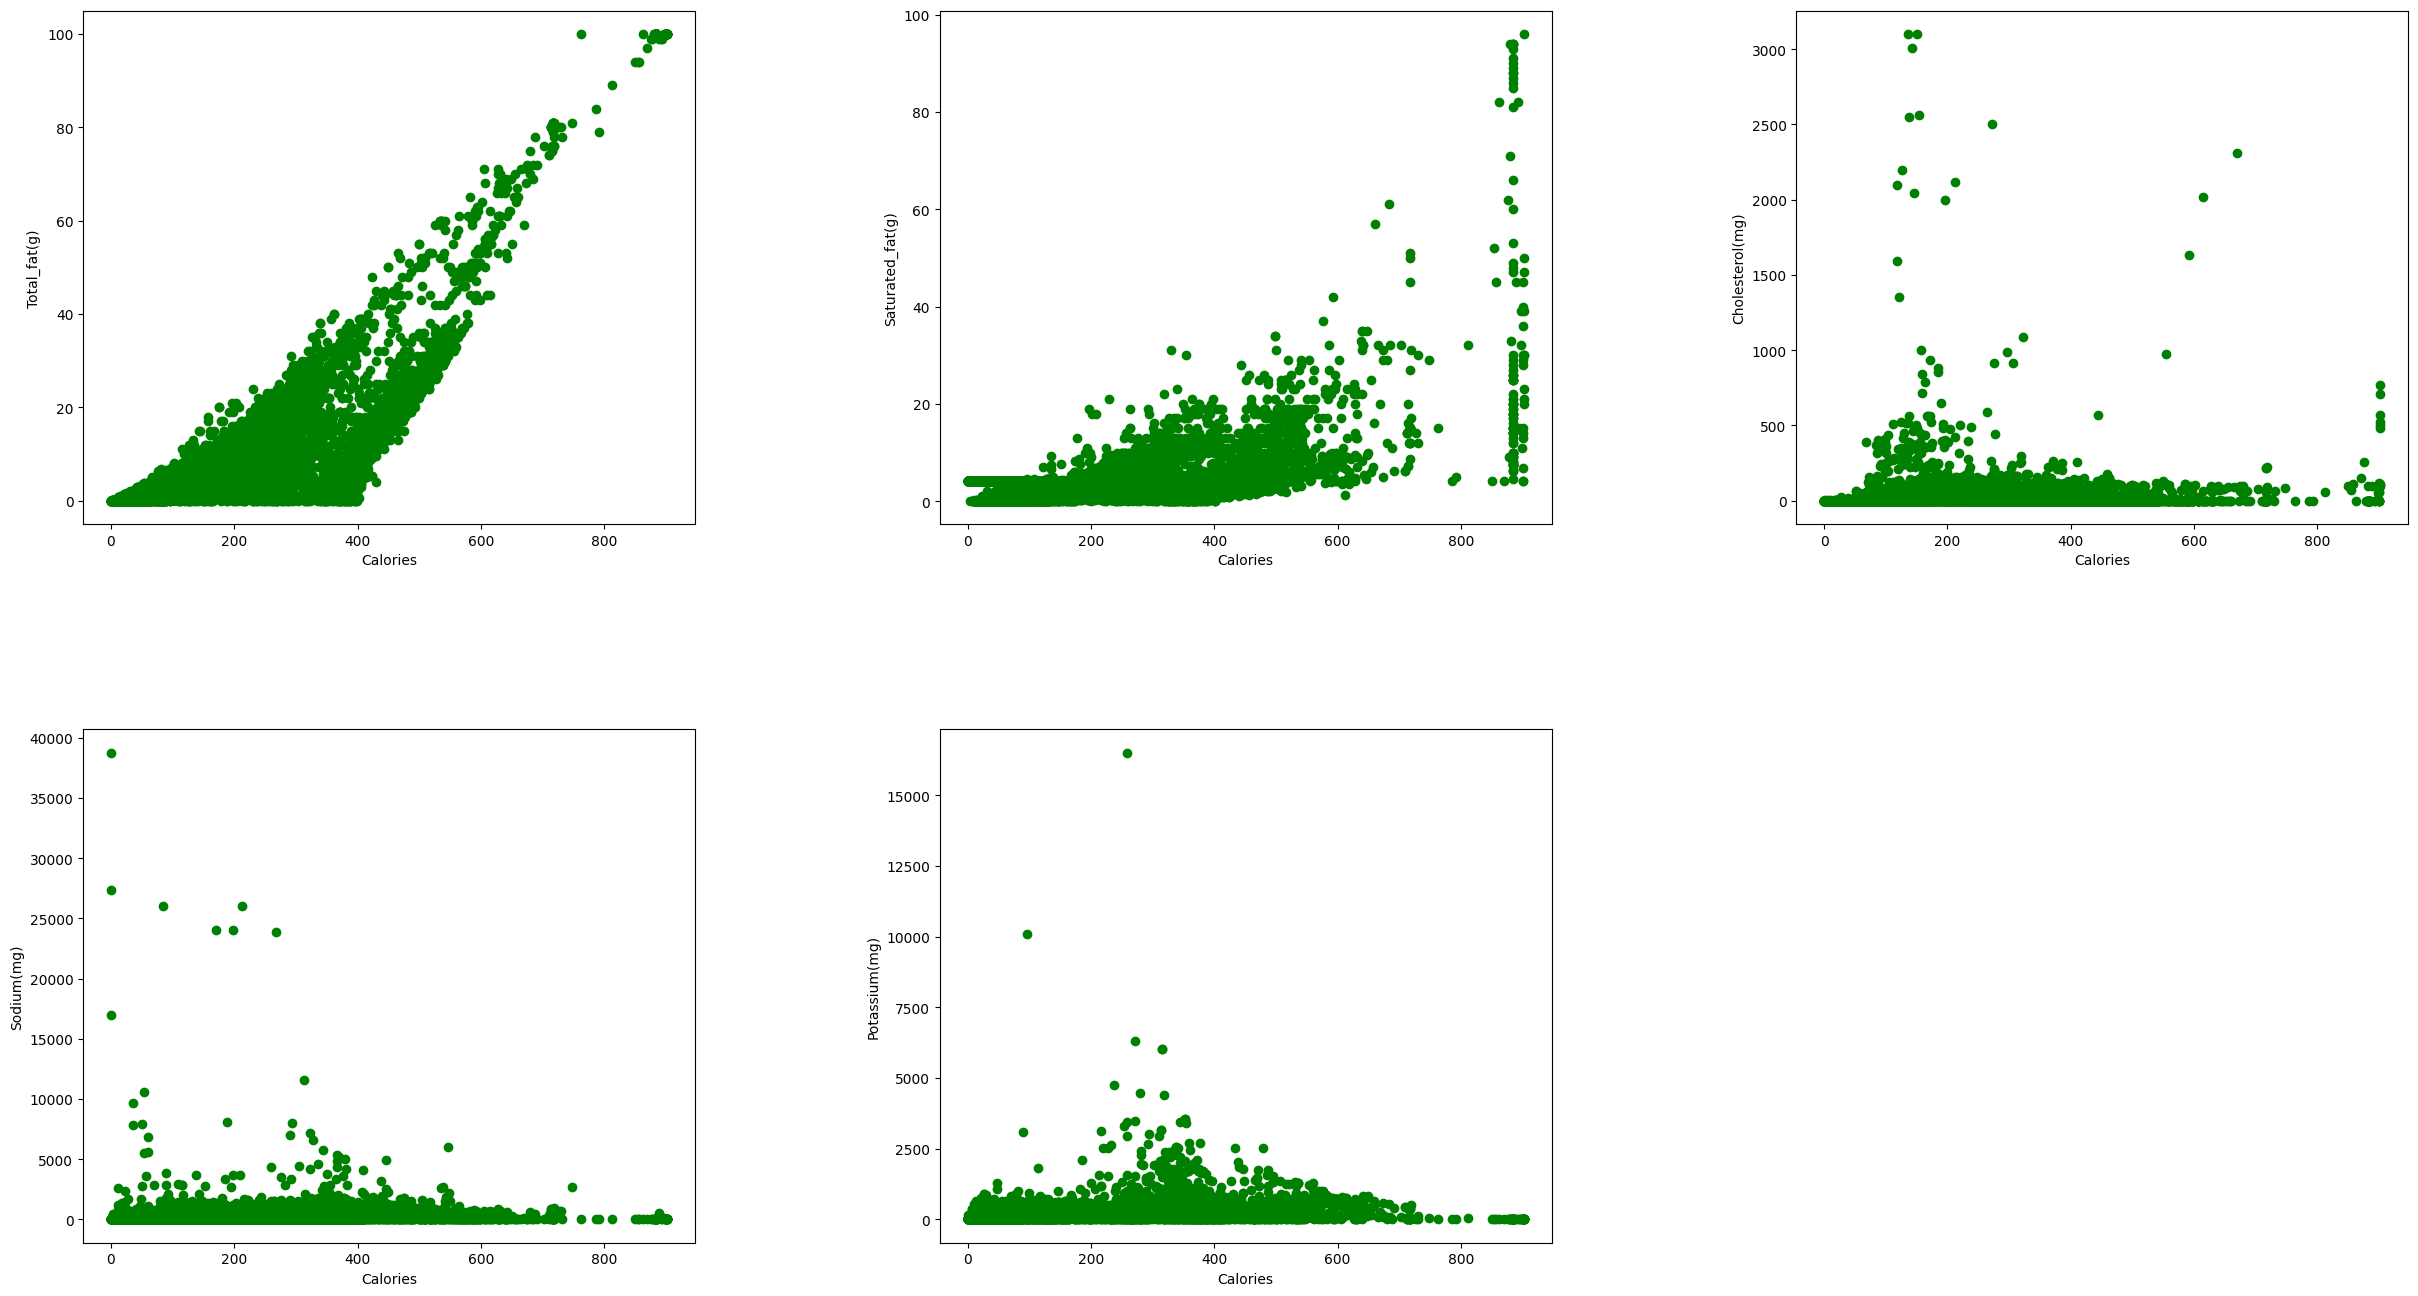

<Figure size 640x480 with 0 Axes>

In [27]:

# Create a scatter plot for each nutrient column
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 16))
nutrient_cols = ['total_fat(g)', 'saturated_fat(g)', 'cholesterol(mg)', 'sodium(mg)', 'potassium(mg)']

# Flatten the axes array to iterate over it in a 1D fashion
axs = axs.flatten()

# Loop over each nutrient column to create a scatter plot
for i, col in enumerate(nutrient_cols):
    axs[i].scatter(nutrition_df['calories'], nutrition_df[col],color= "green")
    axs[i].set_xlabel('Calories')
    axs[i].set_ylabel(col.capitalize())

# Remove any unused axes
for ax in axs[5:]:
    ax.remove()

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plots
plt.show();

#download visualization
plt.savefig("scatterplot.png", transparent=True)

1. There is a strong positive correlation between  total fat and calories. As total fat increases there is an increase in calories
2. There is a weak positive correlation between saturated fat and calories. As saturated fat increase there is slight increase
3. There is no correlation between cholesterol and calories. As seen an increase in cholesterol doesn't increase calories
4. There is no correlation between sodium and calories. As seen an increase in sodium doesn't increase calories
5. There is no correlation between pottasium and calories. As seen an increase in pottasium doesn't increase calories

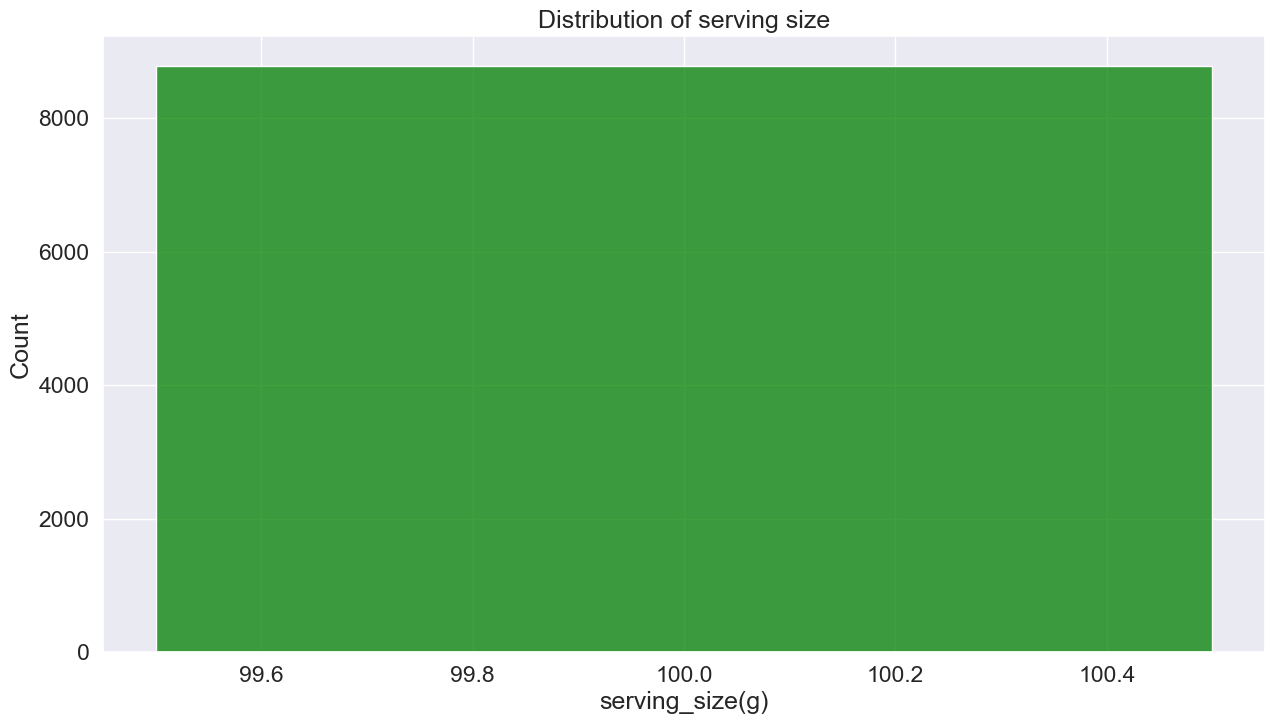

<Figure size 640x480 with 0 Axes>

In [28]:
#distribution of serving size
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
plt.title('Distribution of serving size');
sns.histplot(data=nutrition_df,x='serving_size(g)',color="green")
plt.show();

#download visualization
plt.savefig("servingsize.png", transparent=True)

> In the dataset used,the serving size per food was 100 grams.

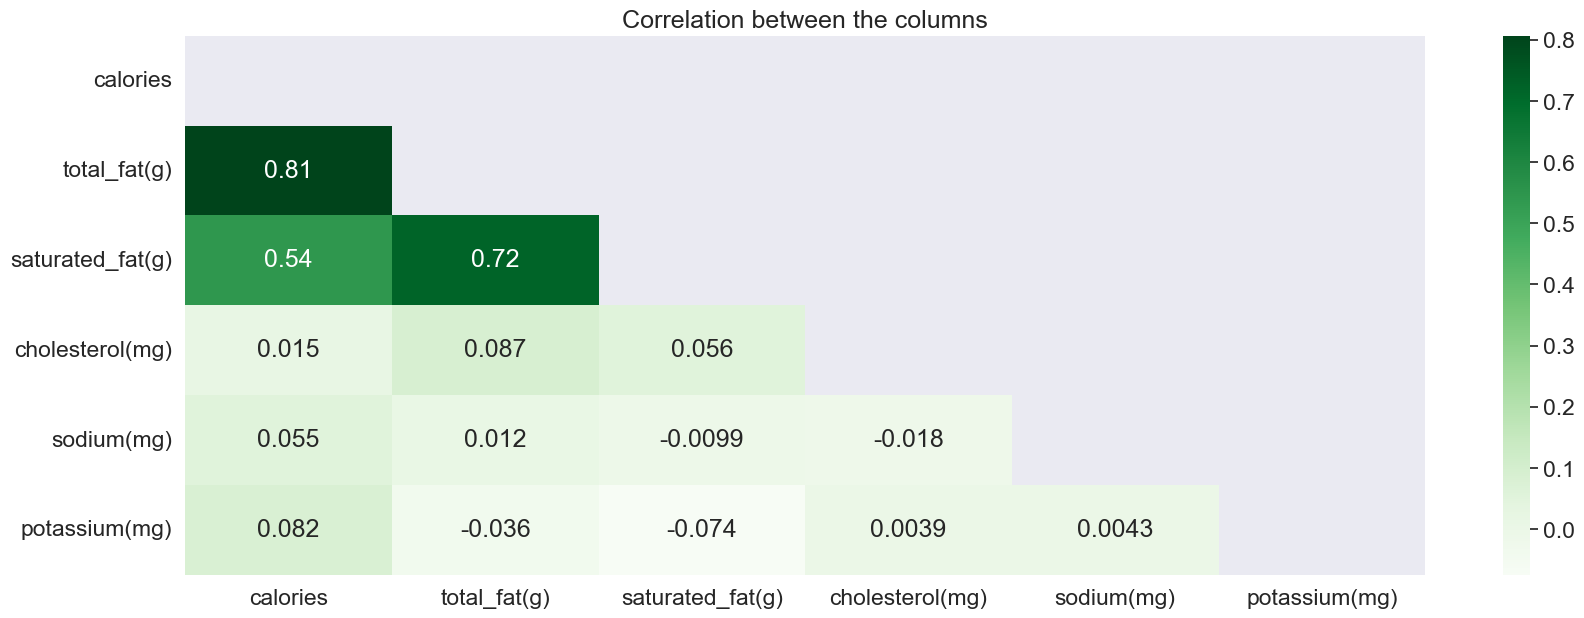

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a correlation matrix of the columns of interest
corr_matrix = nutrition_df[['calories','total_fat(g)',
       'saturated_fat(g)', 'cholesterol(mg)', 'sodium(mg)', 'potassium(mg)']].corr()
mask = np.zeros_like(corr_matrix);
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn
plt.figure(figsize=(20,7));
sns.heatmap(corr_matrix, annot=True, cmap='Greens',mask=mask)
# Show the plot
plt.title('Correlation between the columns')
plt.show();

#download visualization
plt.savefig("heatmap.png", transparent=True)

 The highest correlation is seen between the number of and the amount of total fat in the food specificied.Given a scenario a user wants to reduce the number of calorie intake,they would need to avoid foods with high total fat.

## Recipes dataset

> As the recipe is too big and would take up too much computational power,a random sample will be retrieved.

In [30]:
# getting the recipes random sample.
recipes_sample_df = recipes_df.sample(n=2000, random_state=42)

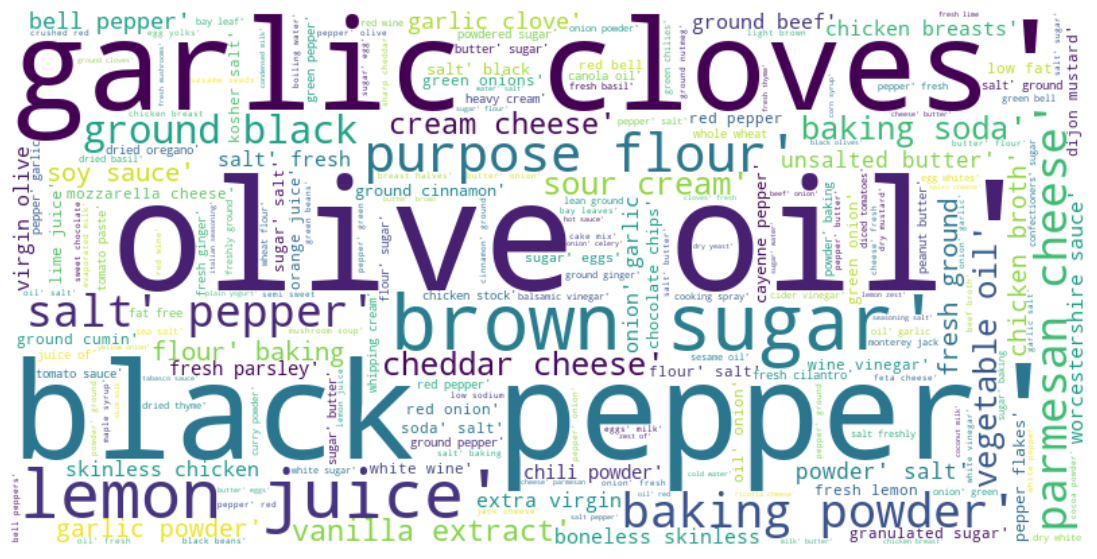

<Figure size 640x480 with 0 Axes>

In [31]:
# Concatenate all ingredients into a single string
all_ingredients = ' '.join(recipes_df['ingredients'])

# Create a word cloud
plt.figure(figsize=(20,7));
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_ingredients)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

#download visualization
plt.savefig("wordcloud.png", transparent=True)

The most popular ingredients used by the users for their recipes include garlic,cloves,olive oil and black pepper.

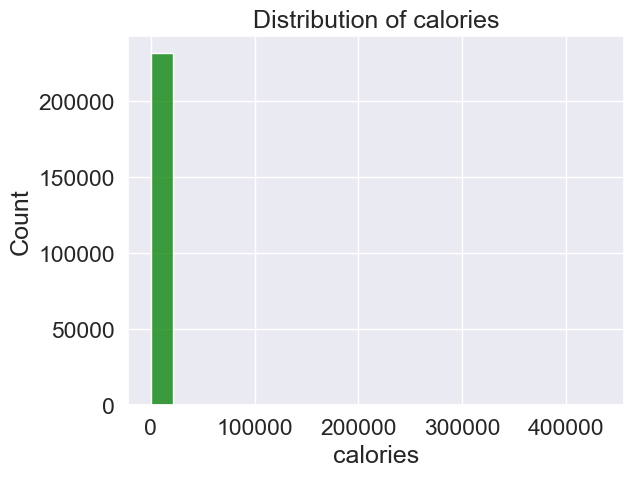

In [32]:
#distribution of calories
sns.histplot(data=recipes_df,x='calories', bins =20, color ='Green')
plt.title('Distribution of calories')
plt.show();

> As seen, the calories feature is skewed to the left and most foods have calories between 400 to 600

# Implementing the solution

### Outliers

In [33]:
# getting numerical columns
num_cols = recipes_df.select_dtypes(exclude = ['object'])

In [34]:
#checking for maximum value for calories
recipes_df['calories'].max()

434360.2

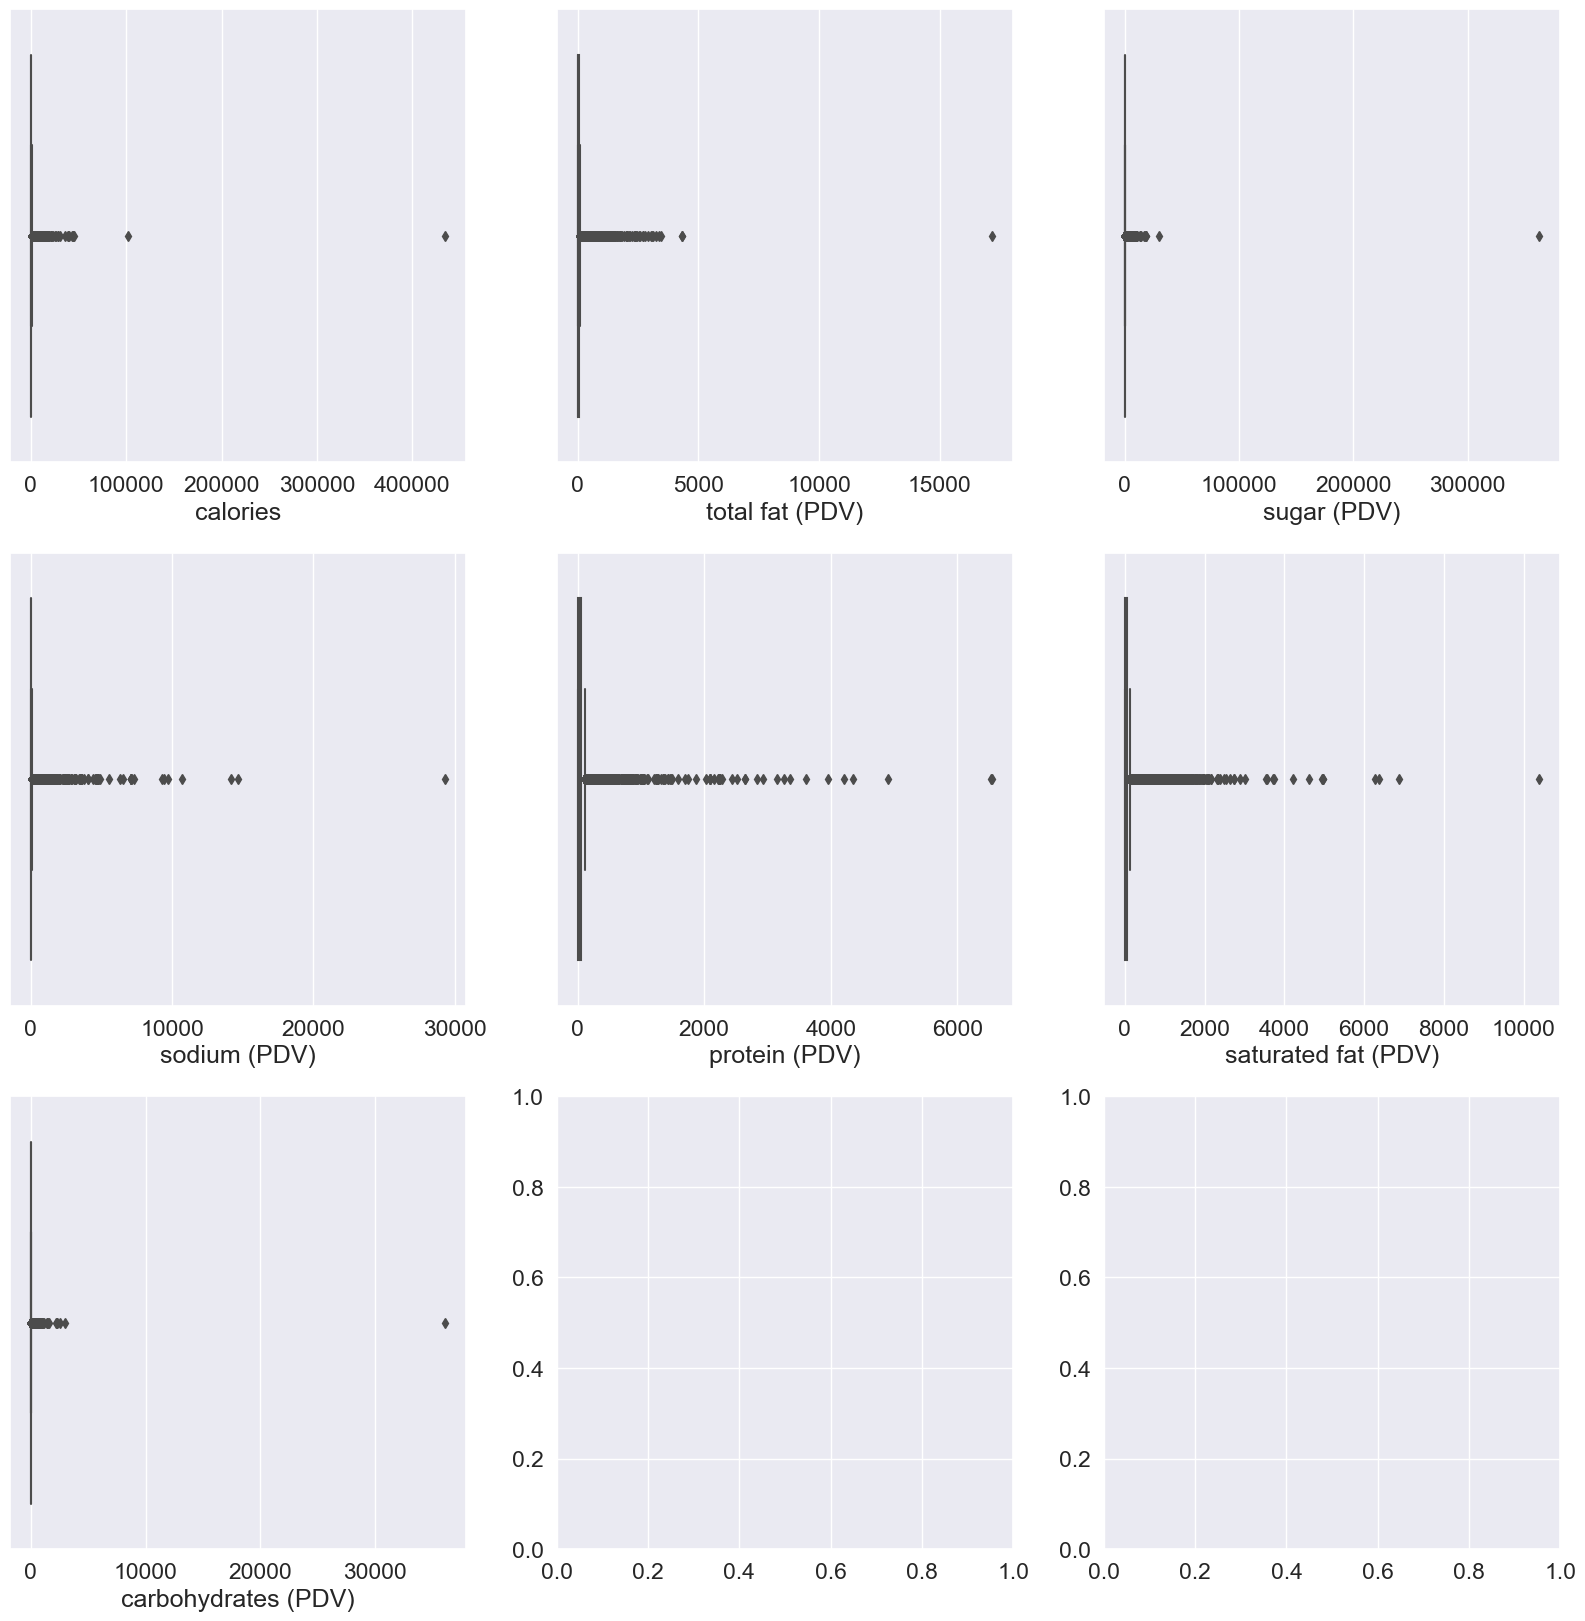

In [35]:
#plotting to check for outliers
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

cols = ['calories', 'total fat (PDV)', 'sugar (PDV)', 
        'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 
        'carbohydrates (PDV)']

for i, col in enumerate(cols):
    sns.boxplot(ax=axes[i//3, i%3], x=recipes_df[col])

In [36]:
#create a function that removes outliers
def outlierRemover(df, columns):
    for x in columns:
        q25,q75 = np.percentile(df[x],[25,75])
        intr_qr = q75-q25
        min_val = q25-(1.5*intr_qr)
        max_val = q75+(1.5*intr_qr)
        df.loc[df[x] < min_val, x] = np.nan
        df.loc[df[x] > max_val, x] = np.nan
    return df

In [37]:
#calling the removing outlier function
num_cols = ["calories", 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']
recipes_df = outlierRemover(recipes_df, num_cols)

In [38]:
#confirming number of missing values
recipes_df.isnull().sum()

id                         0
name                       0
minutes                    0
nutrition                  0
tags                       0
ingredients                0
steps                      0
calories               15736
total fat (PDV)        16264
sugar (PDV)            23780
sodium (PDV)           15919
protein (PDV)           9141
saturated fat (PDV)    16462
carbohydrates (PDV)    15559
dtype: int64

In [39]:
# Dropping rows with missing values
recipes_df = recipes_df.dropna()

## Normalize the data 

In [40]:
scaler = MinMaxScaler()
recipes_data = scaler.fit_transform(recipes_df.drop(columns=['name','id','minutes','nutrition','tags','ingredients','steps']))
normalized_recipes = scaler.fit_transform(recipes_data)
normalized_recipes_df = pd.DataFrame(normalized_recipes)

## D. MODELLING

### Baseline Model.

In [41]:

class CalorieBasedRecommender:
    
    def __init__(self, df):
        self.df = df
        
    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] <= target_calories:
                recommendations.append(row['name'])
            if len(recommendations) == num_recommendations:
                break
        return recommendations


This is the baseline model with a class that takes in the dataframe.The recommend method takes as input a target calorie value and the number of recommendations desired, and returns a list of food recommendations that have equal  calories with the target calorie value.

In [42]:
recommender = CalorieBasedRecommender(nutrition_df)
target_calories = 1000
num_recommendations = 20

recommendations = recommender.recommend(target_calories, num_recommendations)


In [43]:
recommendations

['Cornstarch',
 'Nuts, pecans',
 'Eggplant, raw',
 'Teff, uncooked',
 'Sherbet, orange',
 'Cauliflower, raw',
 'Taro leaves, raw',
 'Lamb, raw, ground',
 'Cheese, camembert',
 'Vegetarian fillets',
 'PACE, Picante Sauce',
 'Goji berries, dried',
 'Mango nectar, canned',
 'Crackers, rusk toast',
 'Chicken, boiled, feet',
 'Quail, raw, meat only',
 'Pie, lemon, fried pies',
 'Peppers, raw, jalapeno',
 'Winged bean tuber, raw',
 'Salami, turkey, cooked']

In [44]:

class RecipeRecommender:
    
    def __init__(self, df):
        self.df = df
        
    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] == target_calories:
                recommendations.append((row['name'], row['ingredients'],row['steps']))
            if len(recommendations) == num_recommendations:
                break
        return recommendations


This is the baseline model with a class that takes in the dataframe.The recommend method takes as input a target calorie value and the number of recommendations desired, and returns a list of recipes  and ingredients that have equal calories with target calorie value.

In [45]:
recommender = RecipeRecommender(recipes_df)
target_calories = 51.5
num_recommendations = 1

recommendations = recommender.recommend(target_calories, num_recommendations)

In [46]:
#gives recommendations of recipes 
recommendations

[('arriba   baked winter squash mexican style',
  "['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",
  "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']")]

## KNN Model

Due to the size of the data set and lack of computational power,a sample has to be created from the main data set.

In [47]:
#creating a sample from the dataset 
recipes_sample = recipes_df.sample(n=20000, random_state=42)

In [48]:
# Define the format of the dataframe
reader = Reader(rating_scale=(0, 5))

# Convert your dataframe to a Surprise dataset
data = Dataset.load_from_df(recipes_sample[['id', 'name', 'minutes']], reader)

#generating a trainset
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  20000 

Number of items:  19991


In [49]:
# knn algoritms
print('KNN_BASIC')
print('*************************************************************************')

cv_knn_basic = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=True)

print('KNN_MEANS')
print('*************************************************************************')


cv_knn_means = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=True)

KNN_BASIC
*************************************************************************
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4107.479916625.7488417.6704215.54492061.01974685.49276131.6623
MAE (testset)     138.2848336.831577.2133 67.3083 98.8628 143.700199.5948 
Fit time          7.78    7.72    7.75    7.46    7.39    7.62    0.16    
Test time         0.02    0.02    0.01    0.03    0.02    0.02    0.01    
KNN_MEANS
*************************************************************************
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4122.06222057.1890383.551616622.9396250.93354687.33526130.2540
MAE (testset)     143.924094.1520 69.9038 338.949371.5715 143.7001101.2183
Fit time          4.16    4.36    4.35    4.24    4.21    4.26    0.08    
Test time         0.03 

> For the first model, KNN_MEANS, the mean RMSE across all folds is 26.9996, with a standard deviation of 6.9996. The mean MAE is 102.2880. The fit time is approximately 18.4 seconds per fold, and the test time is approximately 0.09 seconds per fold.

> For the second model,the mean RMSE across all folds is 117.5033, with a standard deviation of 37.5033. The mean MAE is 143.7001. The fit time is approximately 19.4 seconds per fold, and the test time is approximately 0.05 seconds per fold.

Overall, it seems like the first model (KNN_MEANS) performs better than the second model, with lower RMSE and MAE values.

## SVD Model

In [50]:
#svd
print('SVD')
print('*************************************************************************')

cv_svd = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=True)

SVD
*************************************************************************
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    162.49522068.6341245.183917121.3575498.97094019.32836587.5735
MAE (testset)     62.2795 106.933369.9790 402.137077.1718 143.7001130.1012
Fit time          0.16    0.15    0.15    0.15    0.15    0.15    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [51]:
#summary of SVD and KNN results
print('Evaluation Results:')
print('Algoritm\t RMSE\t\t MAE')
print()


print('KNN Basic', '\t', round(cv_knn_basic['test_rmse'].mean(), 4), '\t\t', round(cv_knn_basic['test_mae'].mean(), 4))
print('KNN Means', '\t', round(cv_knn_means['test_rmse'].mean(), 4), '\t', round(cv_knn_means['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(cv_svd['test_rmse'].mean(), 4), '\t', round(cv_svd['test_mae'].mean(), 4))

Evaluation Results:
Algoritm	 RMSE		 MAE

KNN Basic 	 4685.4927 		 143.7001
KNN Means 	 4687.3352 	 143.7001

SVD 		 4019.3283 	 143.7001


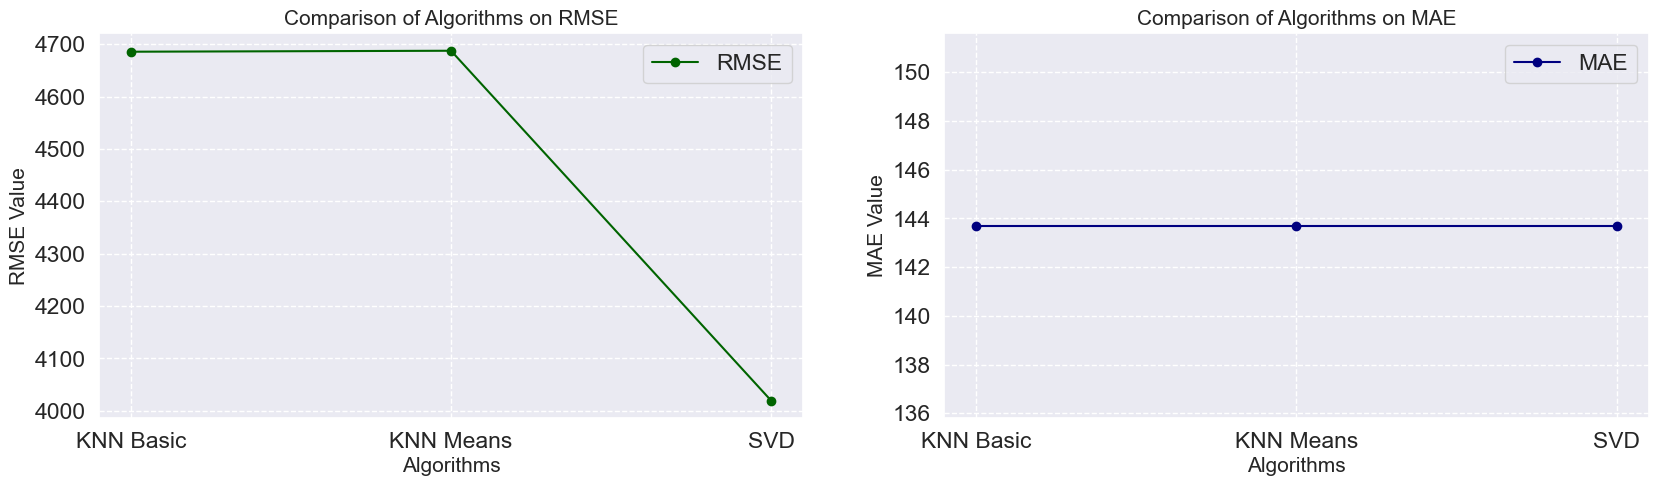

In [52]:
#compare accuracy of each algorithm


# Plotting graphs for comparing accuracy of each algo
x_algo = ['KNN Basic', 'KNN Means', 'SVD']
all_algos_cv = [cv_knn_basic, cv_knn_means, cv_svd]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

# RMSE graph
plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

# MAE graph
plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
#plt.savefig('Images/RMSE_MAE')
plt.show()

From the above table, we can see that the SVD algorithm performed better in terms of RMSE.
The accuracy of each algorithm was compared by plotting graphs using the RMSE and MAE values. The RMSE graph showed that the SVD algorithm had the lowest RMSE value, indicating that it was the most accurate algorithm. 

## Hyperparameter tuning model

In [53]:
# define the parameter grid for k
param_grid = {'k': [5, 10, 15, 20, 25]}

# perform grid search for KNNBasic
knn_basic_grid = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5)
knn_basic_grid.fit(data)

# get the best k value and its corresponding RMSE score for KNNBasic
best_k_basic = knn_basic_grid.best_params['rmse']['k']
best_rmse_basic = knn_basic_grid.best_score['rmse']

# perform grid search for KNNWithMeans
knn_means_grid = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)
knn_means_grid.fit(data)

# get the best k value and its corresponding RMSE score for KNNWithMeans
best_k_means = knn_means_grid.best_params['rmse']['k']
best_rmse_means = knn_means_grid.best_score['rmse']

# print the best k values and their corresponding RMSE scores
print('Best k value and RMSE score for KNNBasic: k = {}, RMSE = {:.4f}'.format(best_k_basic, best_rmse_basic))
print('Best k value and RMSE score for KNNWithMeans: k = {}, RMSE = {:.4f}'.format(best_k_means, best_rmse_means))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Optimal k is at 5.Check to see best distance metrics out of pearson, cosine, msd, and pearson baseline.

> Based on hyperparameter tuning above, best is KNN-Means with cosine similarity where k is 5. The RMSE is =4350.

Use gridsearch to optimize SVD model for number of epochs, regularization, and learning rate. 

In [54]:
#Parameter space
svd_param_grid = {'n_epochs': [20, 25, 30, 40, 50],
                  'lr_all': [0.007, 0.009, 0.01, 0.02],
                  'reg_all': [0.02, 0.04, 0.1, 0.2]}

# This will take 20 to 30 minutes.
gs_svd = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
gs_svd.fit(data)

print('Best value for SVD  -RMSE:', round(gs_svd.best_score['rmse'], 4), '; MAE:', round(gs_svd.best_score['mae'], 4))
print('Optimal params RMSE =', gs_svd.best_params['rmse'])
print('optimal params MAE =', gs_svd.best_params['mae'])

Best value for SVD  -RMSE: 4325.5736 ; MAE: 143.7001
Optimal params RMSE = {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.02}
optimal params MAE = {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.02}


## Test Predictions 

Evaluate to see if the KNN and SVD models above are working as expected and choose the best.

In [55]:
# fit knn_means model on training set
dataset = data.build_full_trainset()
final_knn_model = KNNWithMeans(k=5, sim_options={'name': 'cosine'})
final_knn_model.fit(dataset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [56]:
#fit svd model on training set
final_svd_model = SVD(n_epochs=20, lr_all=0.007, reg_all=0.02)
final_svd_model.fit(dataset)

In [57]:
# Specify the recipe ID for which you want to get the list of similar recipes
rec_id = 31490

final_df = recipes_df[recipes_df['id'] == rec_id][['id', 'name', 'minutes']]
final_df.head(20)

,id,name,minutes
1,31490,a bit different breakfast pizza,30


In [58]:
def recommend_recipes_by_calories(df, target_calories, num_recipes=10): 
    # Filter recipes with similar calorie counts
    similar_recipes = df[df['calories'].between(target_calories - 100, target_calories + 100)]
    
    # Sort the recipes by their similarity to the target calorie count
    similar_recipes = similar_recipes.sort_values(by=['calories'], ascending=True)
    
    # Select the top N most similar recipes
    recommended_recipes = similar_recipes.head(num_recipes)
    
    return recommended_recipes


This code loads a dataset of recipes and their nutritional information, normalizes the features, and calculates the cosine similarity matrix between all recipes based on their nutritional information. Then, the recommend_recipe_by_calories function takes as input a desired calorie count and a number of recommendations to return, selects recipes with similar calorie counts, calculates the mean similarity of each selected recipe with all recipes, ranks the recipes based on similarity, and returns the top N recommended recipe codes.

It takes as input the desired calorie count and the number of recommendations, and then computes the calorie distance between each recipe in the dataset and the target calorie count. It then sorts the recipes in ascending order based on their calorie distance and selects the top N recipes with the closest calorie count to the target. Finally, it ranks the recommended recipes based on their similarity to the input recipe using the content-based filtering model. The function returns a list of ranked recommendations, where each item in the list is a tuple containing the recommended recipe ID and its similarity score. You can modify this function to suit your specific needs and model architecture.

> For the model to be deployed,the cleaned data has to be downloaded.

In [60]:
# Save the cleaned DataFrame as a CSV file
recipes_df.to_csv('cleaned_data.csv', index=False)

# Download the cleaned CSV file
from flask import send_file

#@app.route('/download_cleaned_csv')
def download_cleaned_csv():
    cleaned_file_path = 'cleaned_data.csv'
    return send_file(cleaned_file_path, as_attachment=True)

## E. EVALUATION.

## Follow-up Questions 
- Did we have the right data? 
- Do we need other data to answer our question?
- Did we have the right question? Yes. The question chosen was correct due to the objectives that we wanted to accomplish in the project.



# Recommendations 

- The performance of the model can in the future include more recipes, especially for locally available foods.

- Continuously update and improve your system by incorporating user feedback and adding new features and datasets.

- Collect user preference data through surveys, feedback forms, or user interaction with the recommender system.

- Intergrate whatsapp for use by end users.


# Conclusions 

- This model architecture  can be used to meet specific user 
calories by recommending specified calorie counts

- A number of healthy recipes are available for users , making our
 model diverse
 
- Our project will greatly contribute to the health industry by 
helping individuals make more informed food choices
